In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np

In [3]:
FJoin = os.path.join

In [4]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [5]:
data_train_drive_link = '/content/drive/MyDrive/HOGcsvdata_notargument/Dataframe_training_final_HOG.csv'
label_train_drive_link = '/content/drive/MyDrive/HOGcsvdata_notargument/Labelframe_training_final_HOG.csv'

data_test_drive_link = '/content/drive/MyDrive/HOGcsvdata_notargument/Dataframe_testing_final_HOG.csv'
label_test_drive_link = '/content/drive/MyDrive/HOGcsvdata_notargument/Labelframe_testing_final_HOG.csv'

In [6]:
def read_data(link_data, link_label):
    data = pd.read_csv(link_data, header=None)
    label = pd.read_csv(link_label, header=None)
    return np.array(data), np.array(label).ravel()

In [7]:
data_train, label_train = read_data(data_train_drive_link, label_train_drive_link)
data_test, label_test = read_data(data_test_drive_link, label_test_drive_link)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import math

In [9]:
def change_to_char(num):
  listchar = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
  listnum = [i for i in range(0,89)]
  if (num >= 0 and num <= 88):
    k = listnum.index(num)
    return listchar[k]
  else:
    return -1

In [10]:
Scaler = MinMaxScaler()

data_train = Scaler.fit_transform(data_train)

data_test = Scaler.transform(data_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(data_train, label_train)
predicted = gnb.predict(data_test)

In [13]:
print("* MODEL: GAUSSION NAIVE BAYES")
print('       Accuracy = %.4f' % (accuracy_score(label_test, predicted)*100) + ' %\n')

* MODEL: GAUSSION NAIVE BAYES
       Accuracy = 30.1191 %



In [12]:
print(classification_report(predicted, label_test, target_names=f_data_final))

              precision    recall  f1-score   support

           a       0.71      0.70      0.71        50
          à       0.08      0.19      0.11        21
          á       0.06      0.06      0.06        49
          â       0.38      0.56      0.45        34
         ầ       0.00      0.00      0.00         6
         ấ       0.30      0.09      0.14       171
         ẫ       0.16      0.10      0.12        82
         ẩ       0.06      0.12      0.08        24
          ã       0.04      0.11      0.06        19
          ă       0.14      0.47      0.22        15
         ằ       0.04      0.40      0.07         5
         ắ       0.34      0.21      0.26        82
         ẵ       0.34      0.15      0.21       111
         ẳ       0.12      0.21      0.15        29
          ả       0.68      0.11      0.19       311
          ạ       0.80      0.60      0.68        67
         ậ       0.06      0.43      0.11         7
         ặ       0.48    

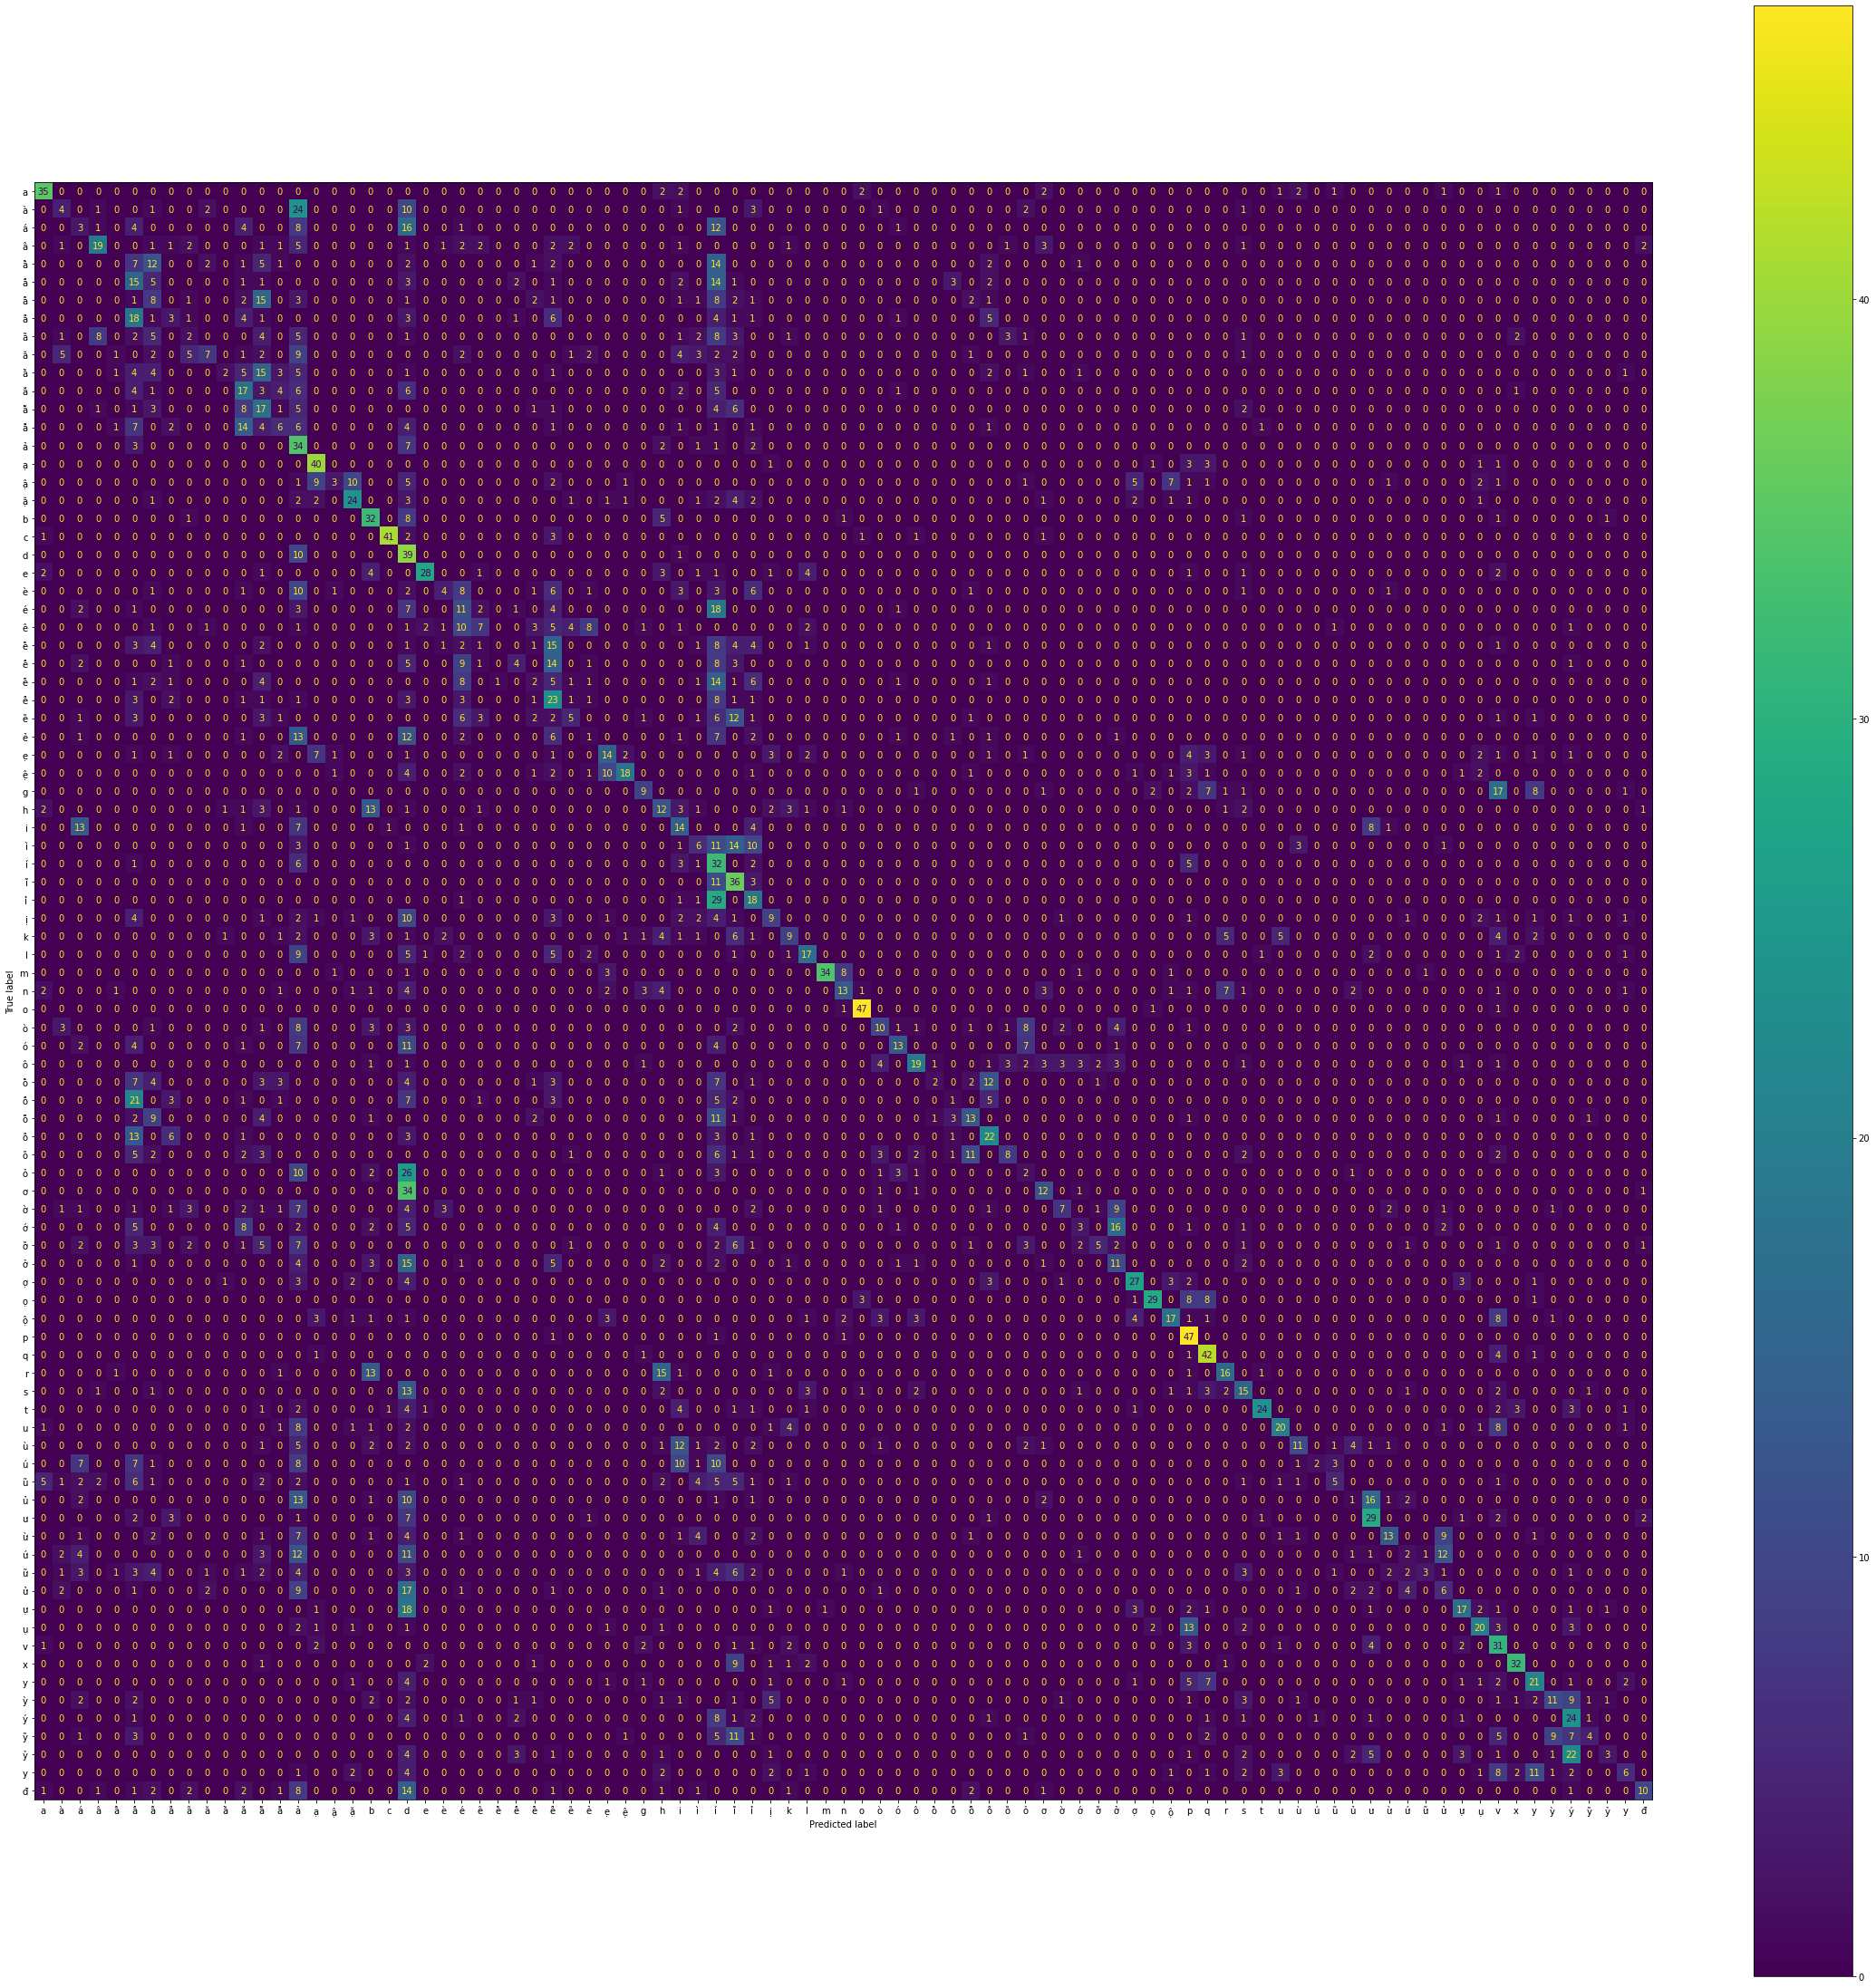

In [14]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 40, 40
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(gnb, data_test, label_test, display_labels=f_data_final)
plt.show()